In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df = df.iloc[:,1:]

In [4]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


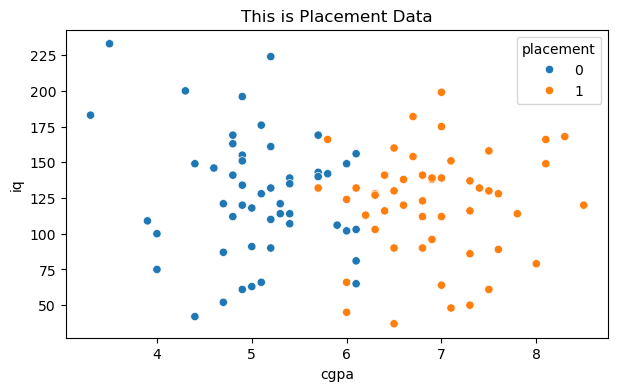

In [5]:
plt.figure(figsize = (7,4))
plt.title('This is Placement Data')
sns.scatterplot(x= 'cgpa', y = 'iq',data = df,hue = 'placement')
plt.show()

In [6]:
df.columns

Index(['cgpa', 'iq', 'placement'], dtype='object')

In [7]:
x = df.iloc[:,:2]
y = df['placement']

In [8]:
df['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43,test_size=0.20)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lo = LogisticRegression()

In [13]:
lo.fit(x_train,y_train)

LogisticRegression()

In [14]:
lo.score(x_test,y_test) * 100

95.0

In [15]:
lo.predict([[5.9,106.0]])

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix

In [36]:
cf = confusion_matrix(y_test,lo.predict(x_test))

In [38]:
cf

array([[ 7,  0],
       [ 1, 12]], dtype=int64)

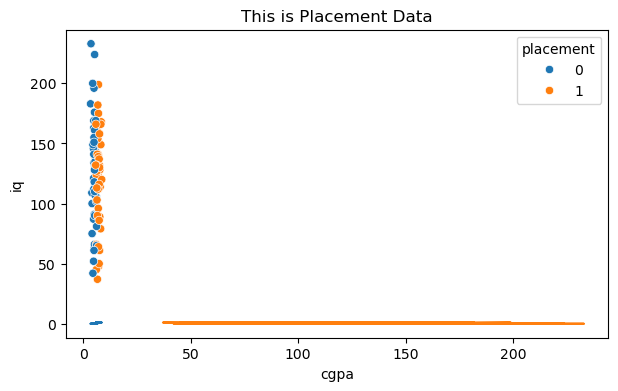

In [40]:
plt.figure(figsize = (7,4))
plt.title('This is Placement Data')
sns.scatterplot(x= 'cgpa', y = 'iq',data = df,hue = 'placement')
plt.plot(x,lo.predict(x))
plt.show()

In [44]:
from mlxtend.plotting import plot_decision_regions

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

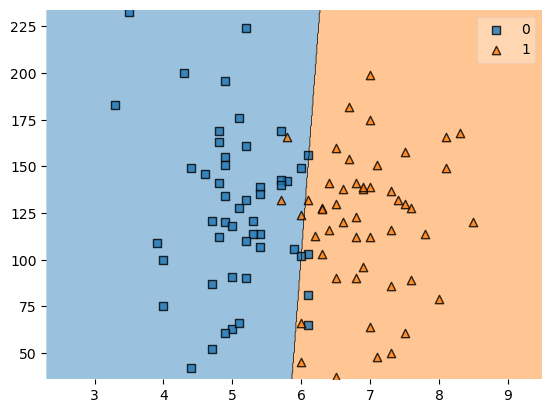

In [48]:
plot_decision_regions(x.to_numpy(),y.to_numpy().ravel(),clf = lo)

In [51]:
data = pd.read_csv('Ice_cream selling data.csv')

In [55]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [159]:
x = data.iloc[:,:1]
y1 = data.iloc[:,1:]

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2, random_state=42)

In [114]:
from sklearn.linear_model import LinearRegression

In [116]:
li = LinearRegression()

In [118]:
li.fit(x_train,y_train)

LinearRegression()

In [119]:
li.score(x_test,y_test)

-0.5751270190188227

In [125]:
data.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

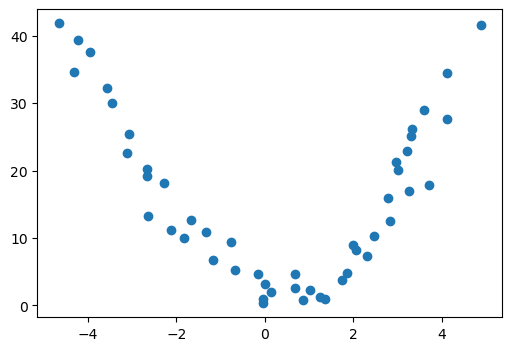

In [131]:
plt.figure(figsize = (6,4))
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'])

In [135]:
from sklearn.preprocessing import PolynomialFeatures

In [140]:
pf = PolynomialFeatures(degree=2)

In [163]:
pf.fit(x)

PolynomialFeatures()

In [165]:
x = pf.transform(x)

In [167]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.2, random_state=42)

In [169]:
from sklearn.linear_model import LinearRegression

In [171]:
li1 = LinearRegression()

In [173]:
li1.fit(x_train,y_train)

LinearRegression()

In [177]:
li1.score(x_test,y_test) * 100

84.30551371938843

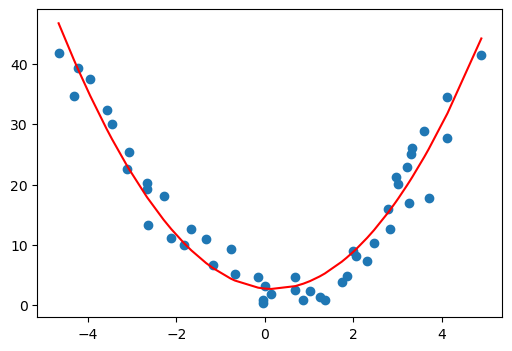

In [186]:
plt.figure(figsize = (6,4))
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'])
plt.plot(data['Temperature (°C)'],li1.predict(x), color= 'r')